In [1]:
!pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36081 sha256=7dfd6b736c0b5c5198cb2cb7b44b88e77e72f222875f9606f5a9e9a83cff625a
  Stored in directory: c:\users\legion\appdata\local\pip\cache\wheels\50\12\d5\bbea58569f0c28fa7a6cb72cc76303ecd20d40c977742486df
Successfully built nsepy


# code for all symbols


``` python
import nsepy.symbols 
list(nsepy.symbols.get_symbol_list()['SYMBOL'])
```



In [2]:
import nsepy.symbols
list(nsepy.symbols.get_symbol_list()['SYMBOL'])


['20MICRONS',
 '21STCENMGM',
 '3IINFOLTD',
 '3MINDIA',
 '3PLAND',
 '4THDIM',
 '5PAISA',
 '63MOONS',
 'A2ZINFRA',
 'AAATECH',
 'AAKASH',
 'AAREYDRUGS',
 'AARON',
 'AARTIDRUGS',
 'AARTIIND',
 'AARTISURF',
 'AARVEEDEN',
 'AARVI',
 'AAVAS',
 'ABAN',
 'ABB',
 'ABBOTINDIA',
 'ABCAPITAL',
 'ABFRL',
 'ABMINTLLTD',
 'ABSLAMC',
 'ACC',
 'ACCELYA',
 'ACCURACY',
 'ACE',
 'ACEINTEG',
 'ACI',
 'ADANIENT',
 'ADANIGREEN',
 'ADANIPORTS',
 'ADANIPOWER',
 'ADANITRANS',
 'ADFFOODS',
 'ADL',
 'ADORWELD',
 'ADROITINFO',
 'ADSL',
 'ADVANIHOTR',
 'ADVENZYMES',
 'AEGISCHEM',
 'AETHER',
 'AFFLE',
 'AGARIND',
 'AGI',
 'AGRITECH',
 'AGROPHOS',
 'AGSTRA',
 'AHL',
 'AHLADA',
 'AHLEAST',
 'AHLUCONT',
 'AIAENG',
 'AIRAN',
 'AIROLAM',
 'AJANTPHARM',
 'AJMERA',
 'AJOONI',
 'AJRINFRA',
 'AKASH',
 'AKG',
 'AKG-RE',
 'AKSHAR',
 'AKSHARCHEM',
 'AKSHOPTFBR',
 'AKZOINDIA',
 'ALANKIT',
 'ALBERTDAVD',
 'ALEMBICLTD',
 'ALICON',
 'ALKALI',
 'ALKEM',
 'ALKYLAMINE',
 'ALLCARGO',
 'ALLSEC',
 'ALMONDZ',
 'ALOKINDS',
 'ALPA',
 'ALPHA

---
# Bollinger plot code
---

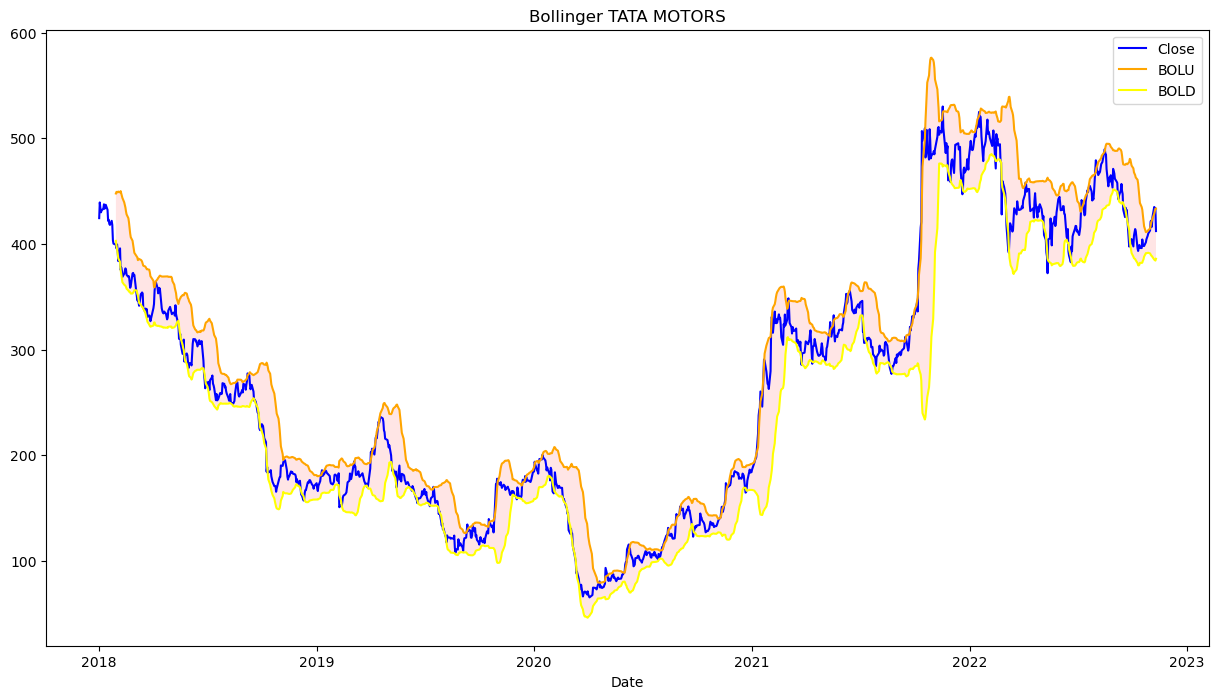

In [16]:
from datetime import date
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from nsepy import get_history

sbin = get_history(symbol='TATAMOTORS',
                   start=date(2018,1,1),
                   end=date(2022,11,10))

ticker=sbin[['Close','Low','High']]

ticker['TP'] = (ticker['Close'] + ticker['Low'] + ticker['High'])/3
ticker['std'] = ticker['TP'].rolling(20).std(ddof=0)
ticker['MA-TP'] = ticker['TP'].rolling(20).mean()
ticker['BOLU'] = ticker['MA-TP'] + 2*ticker['std']
ticker['BOLD'] = ticker['MA-TP'] - 2*ticker['std']
# print(ticker)
# ticker
# plt.rcParams['figure.dpi']=720

ax = ticker[['Close', 'BOLU', 'BOLD']].plot(figsize=(15,8),color=['blue', 'orange', 'yellow'])
ax.fill_between(ticker.index, ticker['BOLD'], ticker['BOLU'], facecolor='red', alpha=0.1)
plt.title('Bollinger TATA MOTORS',)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/results/Bollinger_TATAMOTORS_3YR_20MA.jpeg',dpi=1080)

---
# RSI
---

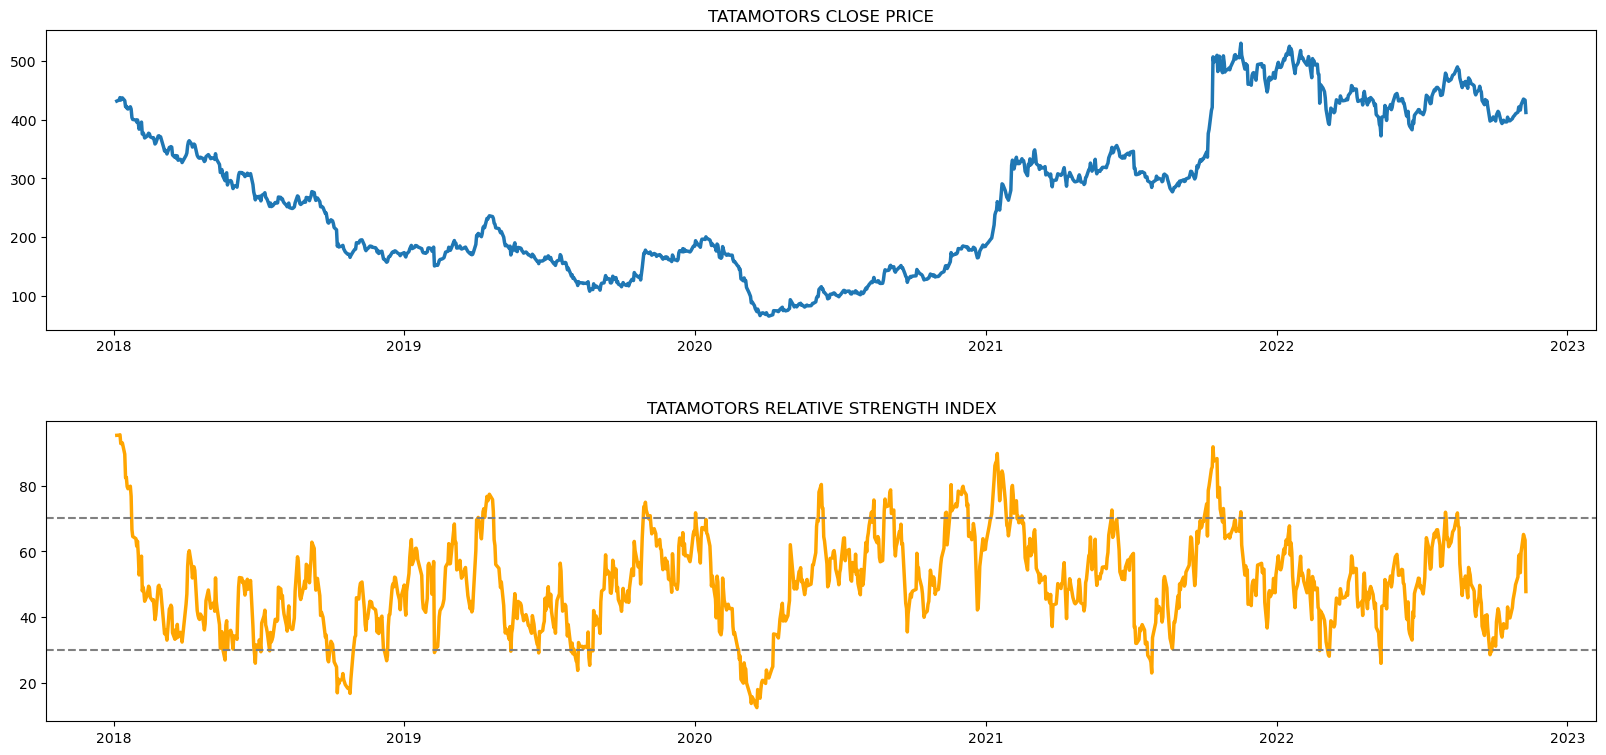

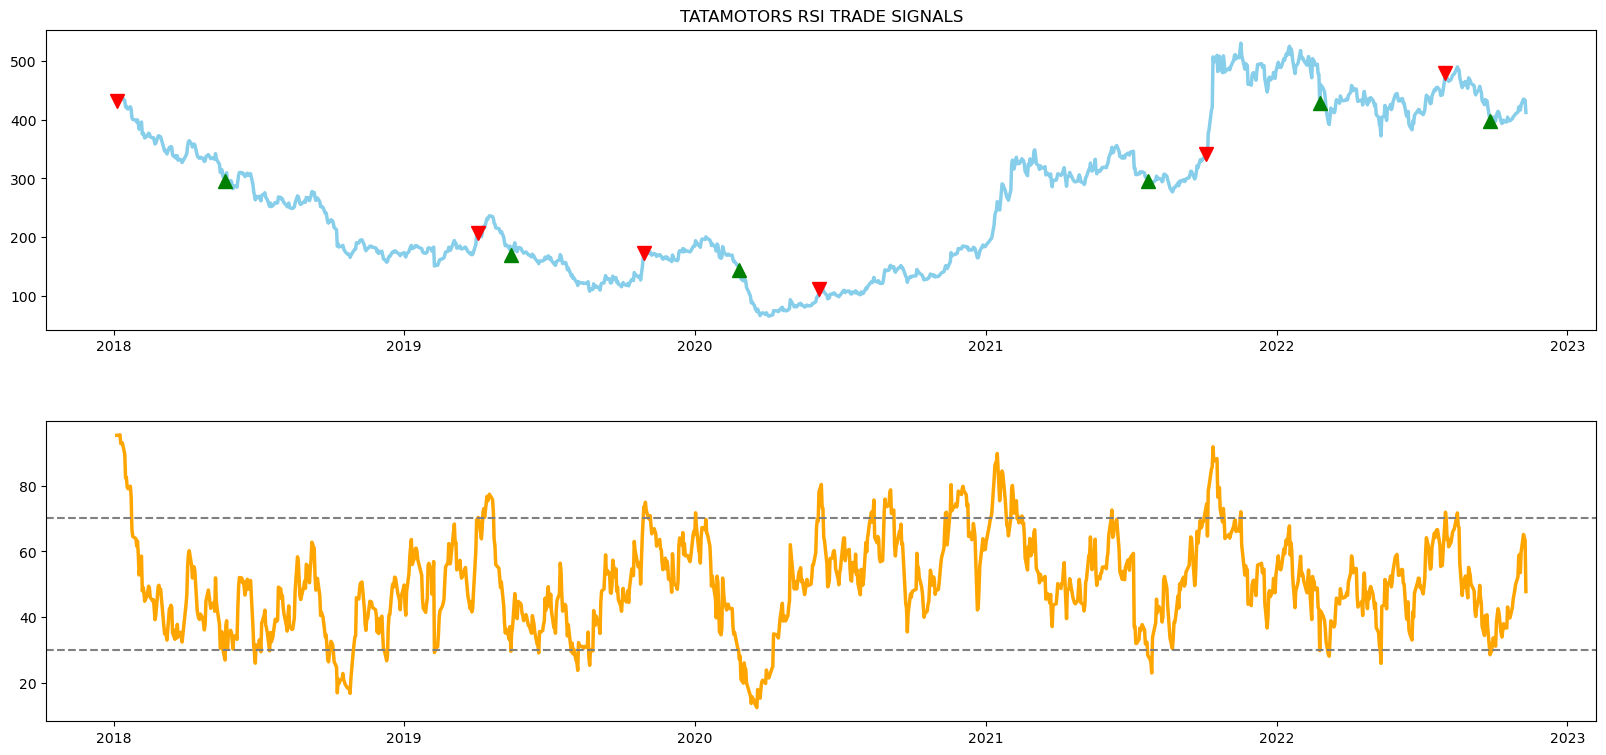

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor 
from datetime import date
from nsepy import get_history


plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)


tck = get_history(symbol='TATAMOTORS',
                   start=date(2018,1,1),
                   end=date(2022,11,10))

def get_rsi(Close, lookback):
    ret = Close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(Close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

tck['rsi_14'] = get_rsi(tck['Close'], 14)
tck = tck.dropna()
# print(ibm)

ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(tck['Close'], linewidth = 2.5)
ax1.set_title('TATAMOTORS CLOSE PRICE')
ax2.plot(tck['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('TATAMOTORS RELATIVE STRENGTH INDEX')
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/results/RSI1_TATAMOTORS.jpeg',dpi=1080)


def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
            

buy_price, sell_price, rsi_signal = implement_rsi_strategy(tck['Close'], tck['rsi_14'])

ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(tck['Close'], linewidth = 2.5, color = 'skyblue', label = 'TATA MOTORS')
ax1.plot(tck.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(tck.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('TATAMOTORS RSI TRADE SIGNALS')
ax2.plot(tck['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/results/RSI2_TATAMOTORS.jpeg',dpi=1080)


---
## MAPE code
---

In [ ]:
import numpy as np
from datetime import date,datetime,timedelta
import pandas as pd
from nsepy import get_history
import matplotlib.pyplot as plt

def mape(tck,k):
  # y=tck
  yhat = tck.rolling(k).mean()
  return np.nanmean( ( np.abs(tck-yhat)/tck) ) *100


end=date.today()-timedelta(7)
start = end-timedelta((5)*365)
tck = get_history('sbin',start,end)['Close']
tck2 = get_history('HDFC',start,end)['Close']
print(mape(tck,20),mape(tck,5))
print(mape(tck2,20),mape(tck2,5))

In [ ]:
def get_tck(name):
  
  end=date.today()-timedelta(7)
  start = end-timedelta((5)*365)
  tck = get_history(name,start,end)['Close']
  # tck2 = get_history('HDFC',start,end)['Close']

l=[]
for i in sym:
  try:
    l.append(mape(get_tck(i),5))
  except:
    print(i)


# Moving Average

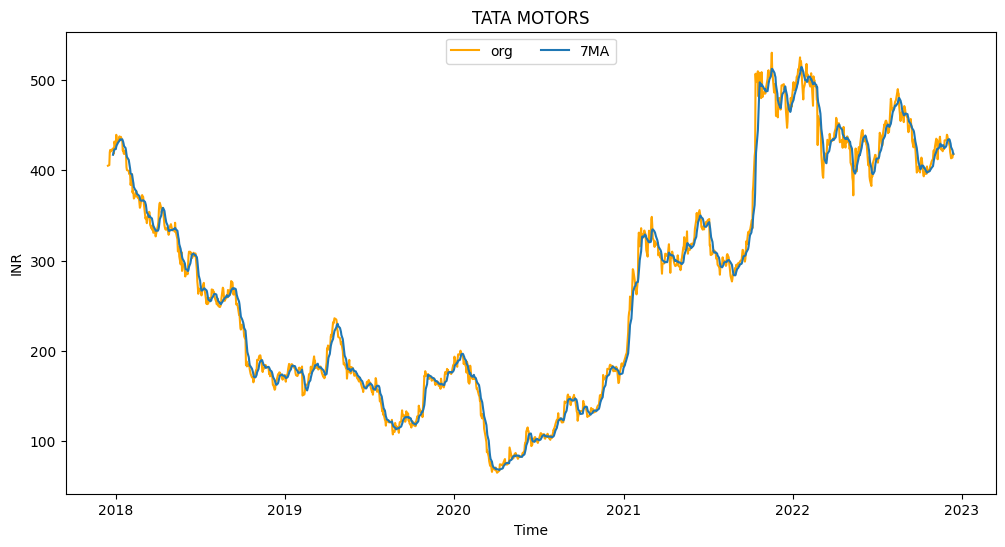

In [ ]:
from nsepy import get_history
import matplotlib.pyplot as plt 
plt.style.use('default')
from datetime import date
tck = get_history(symbol='TATAMOTORS',
                    start=date(2017,12,15), 
                    end=date(2022,12,14))

tck['Close'].plot(figsize=(12,6),color='orange')
tck['Close'].rolling(7).mean().plot(figsize=(12,6))
# tck['Close'].rolling(7).mean().plot(figsize=(12,6),color='orange')
plt.legend(['org','7MA'],loc='upper center',ncol=2)
# plt.legend(['7MA'],loc='upper center')
plt.title('TATA MOTORS')
plt.ylabel('INR')
plt.xlabel('Time')
# sbin['Close'].rolling(7).mean().plot(figsize=(12,6))
# plt.savefig(r'/content/drive/MyDrive/Colab Notebooks/results/TATA_MOT_org+7MA.PNG',dpi=1080,format="png")

---
# MFI
---

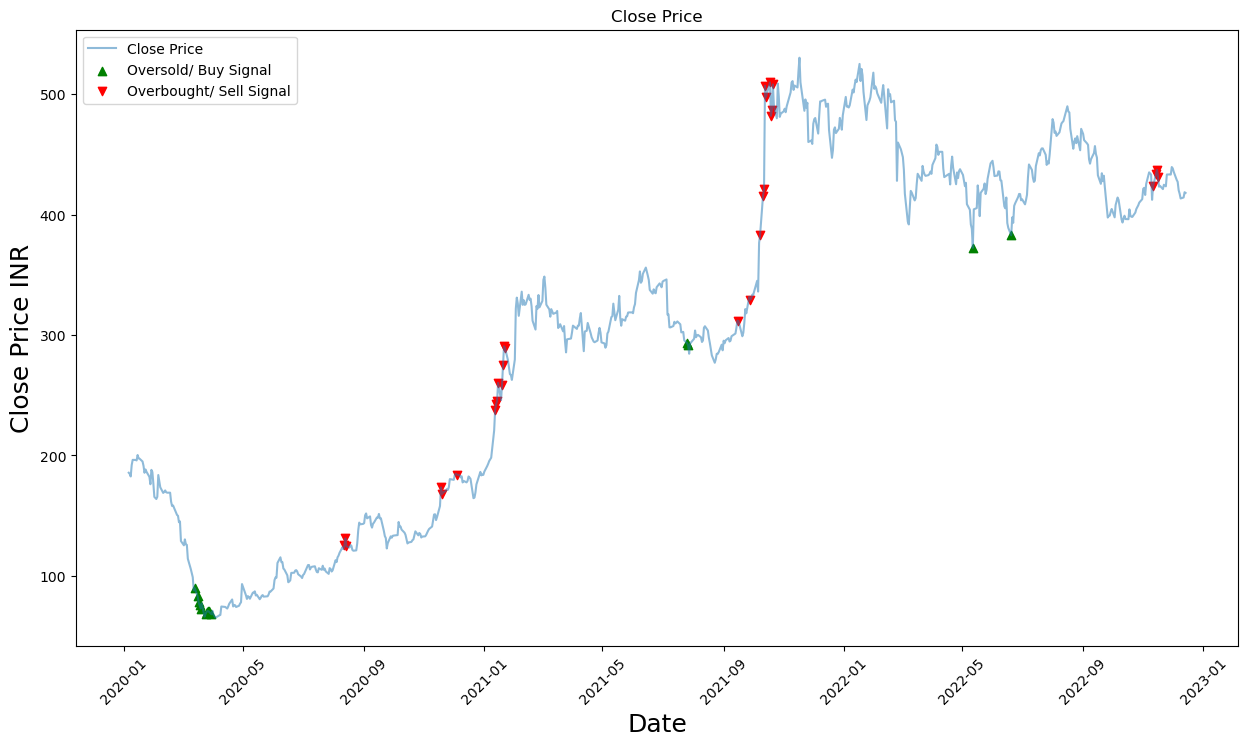

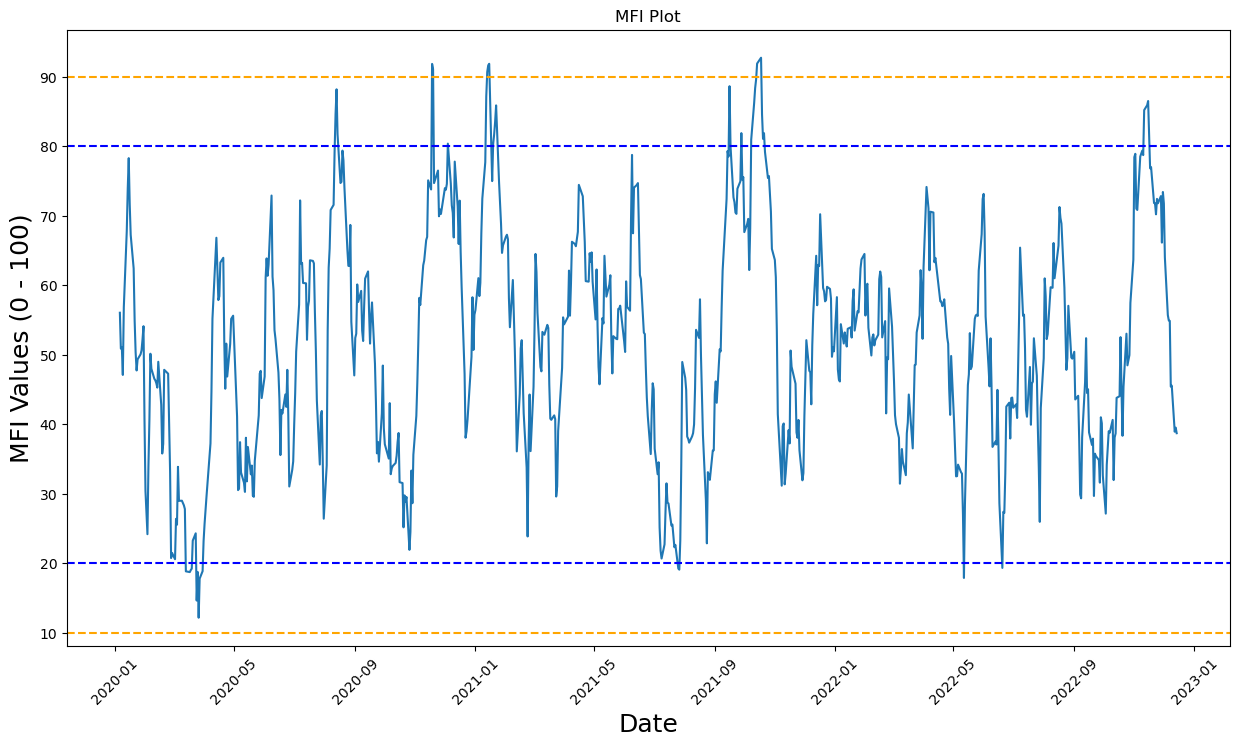

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.style.use('default')
from nsepy import get_history
import matplotlib.pyplot as plt 
from datetime import date
warnings.filterwarnings('ignore')

tck = get_history(symbol='TATAMOTORS',
                    start=date(2019,12,15), 
                    end=date(2022,12,14))
tck=tck[['Close','High','Low','Volume']]
typical_price = (tck['Close'] + tck['High'] + tck['Low']) / 3
period =  14 #The typical period used for MFI is 14 days

#Calculate the money flow
money_flow = typical_price * tck['Volume']
# money_flow

positive_flow =[] #Create a empty list called positive flow
negative_flow = [] #Create a empty list called negative flow
#Loop through the typical price 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]: #if the present typical price is greater than yesterdays typical price
    positive_flow.append(money_flow[i-1])# Then append money flow at position i-1 to the positive flow list
    negative_flow.append(0) #Append 0 to the negative flow list
  elif typical_price[i] < typical_price[i-1]:#if the present typical price is less than yesterdays typical price
    negative_flow.append(money_flow[i-1])# Then append money flow at position i-1 to negative flow list
    positive_flow.append(0)#Append 0 to the positive flow list
  else: #Append 0 if the present typical price is equal to yesterdays typical price
    positive_flow.append(0)
    negative_flow.append(0)


positive_mf =[]
negative_mf = [] 
#Get all of the positive money flows within the time period
for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period : i+1]))
#Get all of the negative money flows within the time period  
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period : i+1]))

mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))
mfi

df2 = pd.DataFrame()
df2['MFI'] = mfi


#Create a new data frame
new_df = pd.DataFrame()
new_df = tck[period:]
new_df['MFI'] = mfi
#Show the new data frame
new_df

def get_signal(data, high, low):
  buy_signal = [] #The stock was over sold
  sell_signal = [] #The stock was over bought
  for i in range(len(data['MFI'])):
      if data['MFI'][i] > high: #Then the stock is over bought, you should sell 
        buy_signal.append(np.nan)
        sell_signal.append(data['Close'][i])
      elif data['MFI'][i] < low: #Then the stock is over sold, you should buy
        buy_signal.append(data['Close'][i])
        sell_signal.append(np.nan)
      else:
        buy_signal.append(np.nan)
        sell_signal.append(np.nan)
  return (buy_signal, sell_signal)


new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]
#Show the new dataframe
new_df

plt.figure(figsize=(15,8))
plt.plot(new_df.index, new_df['Close'],alpha = 0.5, label='Close Price')
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label='Oversold/ Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label='Overbought/ Sell Signal', marker = 'v', alpha = 1)
plt.title('Close Price')
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('Close Price INR',fontsize=18)
plt.legend( loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/results/UPD_close_price_TataMo_mfi_ts3yr_p14.png',dpi=1080,bbox_inches='tight')
# plot the corresponding MFI values and significant levels
plt.figure(figsize=(15,8))
plt.title('MFI Plot')
plt.plot(new_df.index, new_df['MFI'])
plt.axhline(10, linestyle='--',color = 'orange') #Buy
plt.axhline(20, linestyle='--', color = 'blue') #Sell
plt.axhline(80, linestyle='--', color = 'blue') #Sell
plt.axhline(90, linestyle='--', color = 'orange') #Sell
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('MFI Values (0 - 100)',fontsize=18)
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/results/UPD_MFI_TataMo_ts3yr_p14.png',dpi=1080,bbox_inches='tight')